# Train the model

In [118]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load data
f_path = 'regression_training/stage1/y.txt'
y = pd.read_csv(f_path)
y = y.drop(y.columns[0],axis = 1)
y = y.drop(0,axis = 0)

f_path = 'regression_training/stage1/X.txt'
X = pd.read_csv(f_path)
X = X.drop(X.columns[0],axis = 1)
X = X.drop(0,axis = 0)

In [6]:
X_t = X.transpose()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_t)
X_scaled = pd.DataFrame(X_scaled.transpose())

In [7]:
# Train test split with sklearn
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)

In [37]:
from ipynb.fs.full.regression_models import regression
model = regression()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 4080, 16)          288       
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 1020, 16)          0         
_________________________________________________________________
activation_25 (Activation)   (None, 1020, 16)          0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 992, 32)           14880     
_________________________________________________________________
max_pooling1d_20 (MaxPooling (None, 248, 32)           0         
_________________________________________________________________
activation_26 (Activation)   (None, 248, 32)           0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 220, 64)           59456     
__________

In [38]:
# compile model
ad = optimizers.Adam(lr=0.00005)
model.compile(loss='mae', optimizer=ad, metrics=['mse','mae'])

In [21]:
# Reshape data
Xtrain = []
for i in np.arange(len(X_train)):
    h = X_train[i].reshape(4096,1)
    Xtrain.append(h)
X_train = np.asarray(Xtrain)

Xtest = []
for i in np.arange(len(X_test)):
    h = X_test[i].reshape(4096,1)
    Xtest.append(h)
X_test = np.asarray(Xtest)

In [51]:
epoch = 200
batch_size = 5

earlystopping_callback = EarlyStopping(monitor='mean_squared_error',verbose=1,min_delta=0.5,patience=3,baseline=None)

record = model.fit(X_train, y_train, validation_split = 0.20, batch_size=batch_size, epochs=epoch, verbose=1,
                   callbacks=[earlystopping_callback])

Train on 5299 samples, validate on 1325 samples
Epoch 1/200
5299/5299 [==============================] - 64s 12ms/step - loss: 6.7537 - mean_squared_error: 68.4488 - mean_absolute_error: 6.7537 - val_loss: 6.4725 - val_mean_squared_error: 63.3795 - val_mean_absolute_error: 6.4725
Epoch 2/200
5299/5299 [==============================] - 55s 10ms/step - loss: 6.4662 - mean_squared_error: 63.1055 - mean_absolute_error: 6.4662 - val_loss: 6.1758 - val_mean_squared_error: 56.5823 - val_mean_absolute_error: 6.1758
Epoch 3/200
5299/5299 [==============================] - 56s 11ms/step - loss: 6.1578 - mean_squared_error: 57.2694 - mean_absolute_error: 6.1578 - val_loss: 5.7705 - val_mean_squared_error: 50.0165 - val_mean_absolute_error: 5.7705
Epoch 4/200
5299/5299 [==============================] - 53s 10ms/step - loss: 5.9856 - mean_squared_error: 54.6245 - mean_absolute_error: 5.9856 - val_loss: 6.0262 - val_mean_squared_error: 53.3349 - val_mean_absolute_error: 6.0262
Epoch 5/200
5299/529

5299/5299 [==============================] - 53s 10ms/step - loss: 2.4101 - mean_squared_error: 10.4077 - mean_absolute_error: 2.4101 - val_loss: 2.7185 - val_mean_squared_error: 12.9555 - val_mean_absolute_error: 2.7185
Epoch 36/200
5299/5299 [==============================] - 53s 10ms/step - loss: 2.4161 - mean_squared_error: 10.4725 - mean_absolute_error: 2.4161 - val_loss: 2.1762 - val_mean_squared_error: 8.9631 - val_mean_absolute_error: 2.1762
Epoch 37/200
5299/5299 [==============================] - 53s 10ms/step - loss: 2.4104 - mean_squared_error: 10.3893 - mean_absolute_error: 2.4104 - val_loss: 2.2470 - val_mean_squared_error: 9.9120 - val_mean_absolute_error: 2.2470
Epoch 00037: early stopping


In [99]:
# Save model
model.save('regression_stage1A.h5')  # creates a HDF5 file 'my_model.h5'

In [172]:
# Save test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled.values,y.values,test_size=0.1,random_state=13)
X_test_df = pd.DataFrame(X_test)
f_path = 'regression_training/stage1B/1A_test_X.txt'
X_test_df.to_csv(f_path)
y_test_df = pd.DataFrame(y_test)
f_path = 'regression_training/stage1B/1A_test_y.txt'
y_test_df.to_csv(f_path)

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


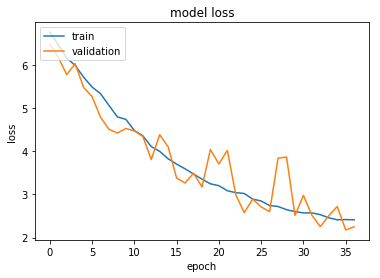

In [52]:
print(record.history.keys())
# "Loss"
plt.plot(record.history['loss'])
plt.plot(record.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Prediction

/Users/DRRRR/anaconda/envs/machinelearning/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


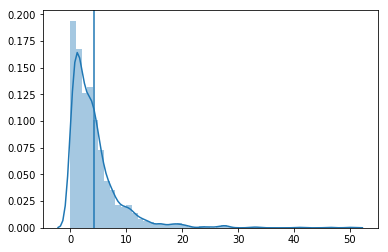

mean %difference: 4.23997220430281
standard deviation of %difference 4.625146334474914


In [73]:
preds = model.predict(X_test)
 
# compute the difference between the *predicted* and *actual* 
# then compute the percentage difference and the absolute percentage difference
diff = preds.flatten() - y_test.flatten()
percentDiff = (diff / y_test.flatten()) * 100
absPercentDiff = np.abs(percentDiff)
 
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)

sns.distplot(absPercentDiff)
plt.axvline(mean, 0,1)
plt.show()

print("Mean %difference:",mean)
print("Standard deviation of %difference:",std)

In [135]:
absPercentD = absPercentDiff.reshape(len(y_test),2)
count = 0
percentage_cut = 20

grad = []
badmass = []


for i in np.arange(len(absPercentD)):
    if absPercentD[i][0]>percentage_cut or absPercentD[i][1]>percentage_cut:
        count += 1
        grad.append(max(absPercentD[i][0],absPercentD[i][1]))
        badmass.append(y_test[i])
        print()
        print("Absolute Percent Difference: ",absPercentD[i])
        print("Actual masses: ",y_test[i])
        print("Predicted masses: ",preds[i])

print()
print("A total number of ", count, " predictions have above ", percentage_cut, " absolute percent difference.")


Absolute Percent Difference:  [40.97974332  1.14989977]
Actual masses:  [11.04759672 77.14784216]
Predicted masses:  [ 6.52032 76.26072]

Absolute Percent Difference:  [33.46274304 13.51795483]
Actual masses:  [39.7029024  97.25098081]
Predicted masses:  [52.988583 84.10464 ]

Absolute Percent Difference:  [20.33250564  1.01032009]
Actual masses:  [13.263968   76.83012423]
Predicted masses:  [10.567071 76.053894]

Absolute Percent Difference:  [27.75285631  2.47378204]
Actual masses:  [12.46704893 72.60019263]
Predicted masses:  [ 9.007087 70.80422 ]

Absolute Percent Difference:  [20.81745362  0.54439571]
Actual masses:  [12.0828794  79.22162336]
Predicted masses:  [ 9.567532 78.790344]

Absolute Percent Difference:  [27.60537395  1.32301499]
Actual masses:  [11.45108269 80.52881003]
Predicted masses:  [ 8.2899685 79.4634   ]

Absolute Percent Difference:  [20.78159537  7.66886815]
Actual masses:  [33.19903475 78.40644129]
Predicted masses:  [40.098324 72.393555]

Absolute Percent Di

In [143]:
# make panda dataframe
summary = pd.DataFrame(badmass,columns = ["m1","m2"])
summary['percentage']=grad

Blues = plt.get_cmap('Blues')
norm = [float(i)/max(grad) for i in grad]
colors = [Blues(c) for c in norm]

summary['colors']=colors

# For stage 1B data generation

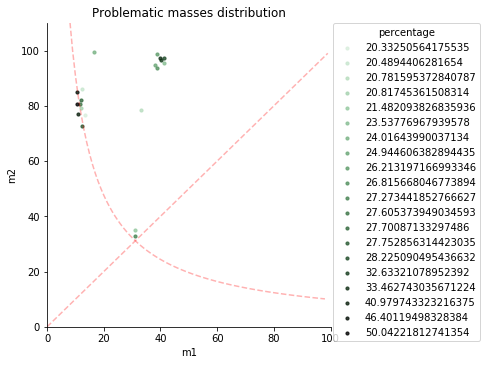

In [164]:
# Summary for training data 1B:

sns.lmplot(x="m1", y="m2",
           hue="percentage",
           data = summary,
           fit_reg=False,
           scatter_kws={"marker": "D",
                        "s": 10},
           palette = sns.cubehelix_palette(len(colors), start=2, rot=0, dark=0, light=.9))

plt.plot(np.arange(100),'r--',alpha=0.3)
plt.plot(1000/np.arange(1,100),'r--',alpha=0.3)

plt.title('Problematic masses distribution')
plt.xlabel('m1')
plt.ylabel('m2')
plt.ylim(0,110)
plt.xlim(0,100)
plt.show()